### Задание 1.1. Показатели надежности невосстанавливаемых объектов ###

#### *1. Средняя наработка до отказа забойного двигателя рана 50 ч. Считая интенсивность отказов постоянной, построить график вероятности безотказной работы.* ####

Интенсивность отказов – условная плотность вероятности отказа в момент $t$ при условии того, что до t отказа не было,
$$\lambda(t)=\lim\limits_{h\to 0} = \frac{1}{h}\frac{F(t+h)-F(t)}{1-F(t)} $$

Формулу можно переписать в следующем виде:
$$ \lambda(t) = \frac{F'(t)}{1-F(t)} = \frac{f(t)}{R(t)} = -\frac{R'(t)}{R(t)} = -\frac{dlnR(t)}{dt} $$

Рассмотрим стабильный период работы, когда опасность отказа постоянна,
$$ \lambda(t)=\lambda=const>0 $$
при $ t>=0 $. Это означает, что отказы *внезапны*, происходят без видимой причины.

Из этого уравнения можно найти вероятность безотказной работы, $ R(t)=e^{-\lambda t} $ .

Средняя наработка до отказа и дисперсия для этого распределения равны соответственно $$ T=M\xi=\lambda^{-1}$$ $$ \sigma^{2}=D\xi=\lambda^{-2} $$

Отсюда, если $ T=50 $, то $ \lambda^{-1} = 50 \Rightarrow \lambda = \frac{1}{50} = 0.02 $

В итоге, получаем *вероятность безотказной работы* $R(t)=e^{-0.02 t}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

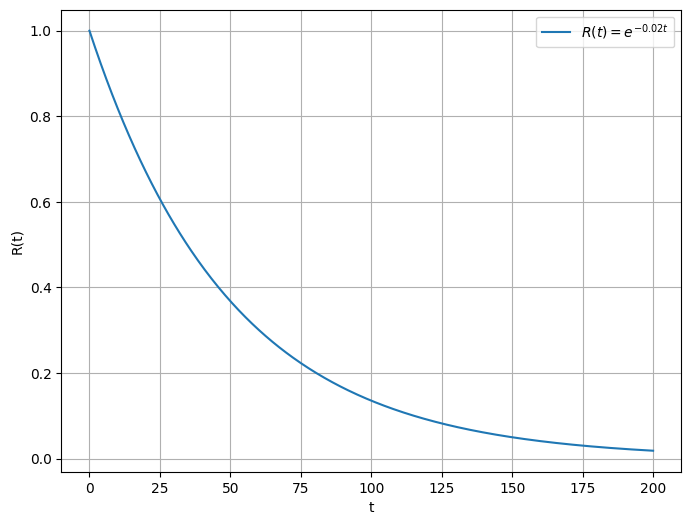

In [4]:
# Объявление фнкции R(t)
def R(t):
    return np.exp(-0.02 * t)

# Создаем диапазон для t
t_values = np.linspace(0, 200, 500)

# Вычисляем соответсвующие значения для R(t)
R_values = R(t_values)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(t_values, R_values, label=r'$R(t) = e^{-0.02t}$')
plt.xlabel('t')
plt.ylabel('R(t)')
plt.grid(True)
plt.legend()
plt.show()


#### *2. Электроприбор имеет предохранитель для защиты от короткого замыкания. В случае короткого замыкания предохранитель перегорает, но после восстановления питания (будем считать, что оно мгновенное) прибор снова включается в работу. Интенсивность возникновения коротких замыканий можно считать постоянной, среднее время между ними равно 48 ч. Построить графики вероятности безотказной работы, плотности наработки до отказа и интенсивности отказов электроприбора.* ####

В некоторых случаях отказ возникает в результате серии нескольких внезапных импульсов (ударов, повреждений). Тогда наработка до отказа – это сумма времен между импульсами. Если
времена между импульсами независимы и экспоненциально распределены с одним и тем же параметром $\lambda$, то наработка до отказа имеет распределение Эрланга с n степенями свободы (будем
считать, что отказ возникает после n-го импульса).

1. Плотность распределения Эрланга с $n$ степенями свободы: $$f(t) = \frac{\lambda^n t^{n-1}}{(n-1)!}e^{-\lambda t}$$

2. Функция распределения Эрланга с $n$ степенями свободы: $$ F(t)= \int_{0}^{t}f(u)du=1-e^{-\lambda t}\sum_{k=0}^{n-1}\frac{(\lambda t)^k}{k!}$$

3. Вероятность безотказной работы: $$R(t) = 1 - F(t) = e^{-\lambda t}(\lambda t+1)$$

4. Интенсивность отказов $\lambda$: $$\lambda(t)=\frac{f(t)}{R(t)}$$

5. Математическое ожидание для распределения Эрланга с $n$ степенями свободы: $$ T=M\xi=n\lambda^{-1} $$
$$\lambda=\frac{n}{T}$$



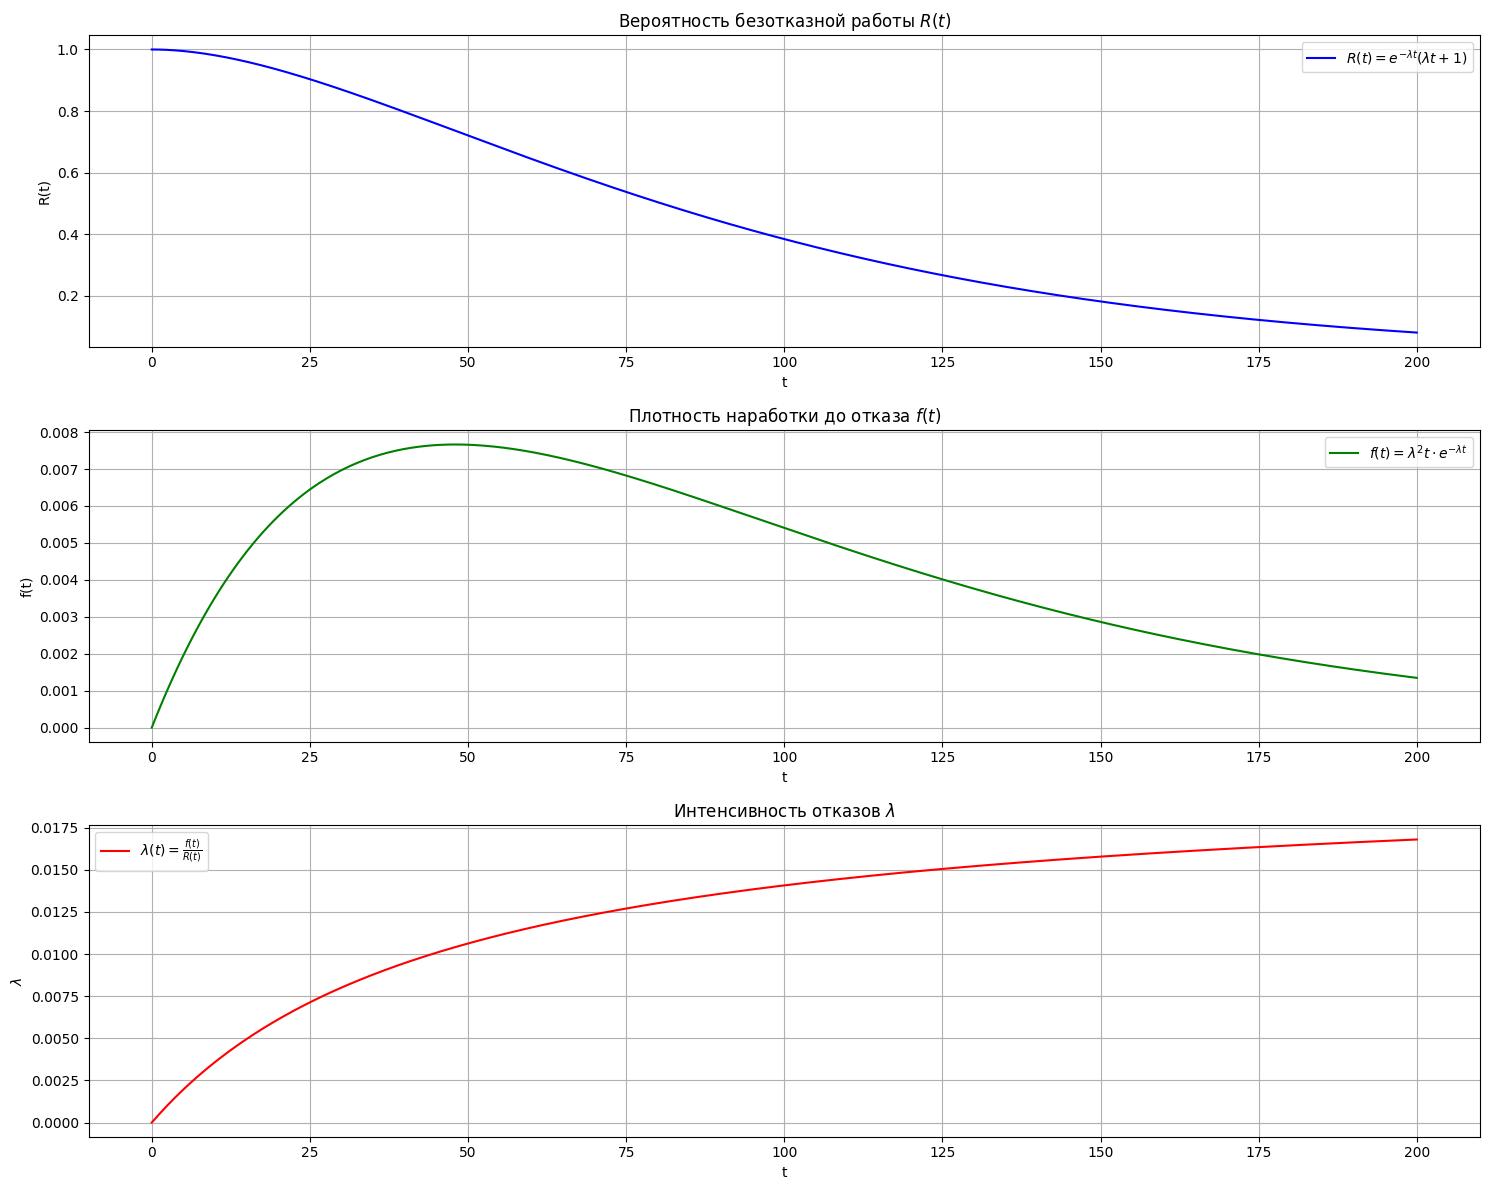

In [5]:
# Дано
T_mean = 96  # среднее время между импульсами
lambda_param = 2 / T_mean  # параметр распределения

# Определим функции для расчетов
def R(t):
    return np.exp(-lambda_param * t) * (lambda_param * t + 1)

def f(t):
    return lambda_param**2 * t * np.exp(-lambda_param * t)

def lambda_total(t):
    return f(t) / R(t)

# Время для построения графиков
t_values = np.linspace(0, 200, 500)

# Вычислим значения функций
R_values = R(t_values)
f_values = f(t_values)
lambda_values = [lambda_total(t) for t in t_values]

# Построим графики
plt.figure(figsize=(15, 12))

# Вероятность безотказной работы
plt.subplot(3, 1, 1)
plt.plot(t_values, R_values, label=r'$R(t) = e^{-\lambda t}(\lambda t+1)$', color='blue')
plt.title(r"Вероятность безотказной работы $R(t)$")
plt.xlabel('t')
plt.ylabel('R(t)')
plt.grid(True)
plt.legend()

# Плотность наработки до отказа
plt.subplot(3, 1, 2)
plt.plot(t_values, f_values, label=r'$f(t) = \lambda^2 t\cdot e^{-\lambda t}$', color='green')
plt.title(r"Плотность наработки до отказа $f(t)$")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.legend()

# Интенсивность отказов
plt.subplot(3, 1, 3)
plt.plot(t_values, lambda_values, label=r'$\lambda(t) = \frac{f(t)}{R(t)}$', color='red')
plt.title(r"Интенсивность отказов $\lambda$")
plt.xlabel('t')
plt.ylabel(r'$\lambda$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### *3. Известно, что интенсивность отказов газоперекачивающего агрегата (ГПА) прямо пропорциональна его наработке, λ(t) = 0.02 t. Построить графики вероятности безотказной работы и плотности распределения наработки до отказа.* ####

**Распределение Вейбулла-Гнеденко** – модель периодов приработки и старения

Рассмотрим модель роста опасности отказа по степенному закону, $$\lambda(t)=at^b,~~~~~~a>0, b>0$$
Отсюда найдем вероятность безотказной работы, $R(t) = e^{-\frac{a}{b+1} t^{b+1}}$

Переобозначим параметры так, чтобы эта формула записывалась более удобно, $b + 1 = \alpha$, $\frac{a}{b+1} = \lambda$. Тогда $R(t) = e^{−\lambda t^{\alpha}}$
при $t \ge 0$, а $\lambda > 0$ и $\alpha > 0$ – параметры распределения.

Плотность распределения имеет вид $$f(t)=\lambda\alpha t^{\alpha-1} e^{-\lambda t^{\alpha}}$$

В нашем случае, $a=0.02, b=1$. Тогда, $\alpha = 2, \lambda=0.01$

Тогда, формулы принимают вид:
- Вероятность безотказной работы: $R(t) = e^{−0.01 t^{2}}$
- Плотность распределения наработки до отказа: $f(t)=0.02 t \cdot e^{-0.01 t^2}$

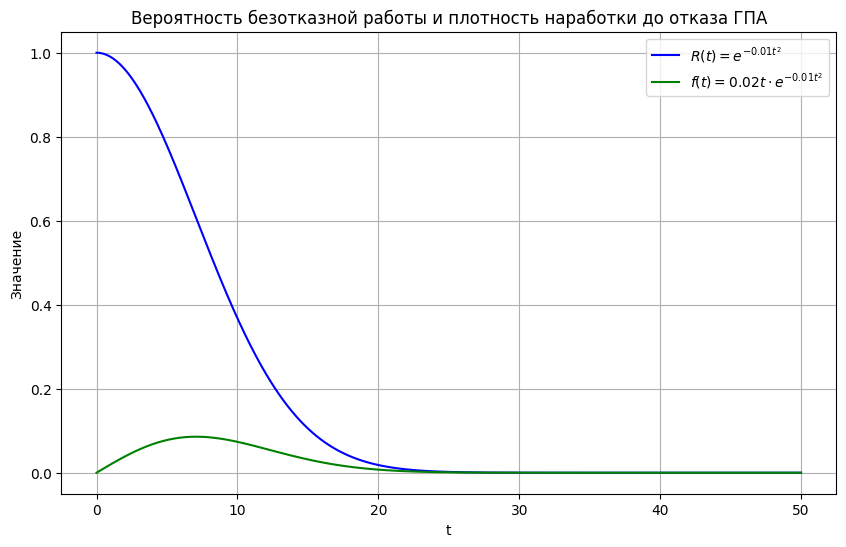

In [6]:
# Дано: интенсивность отказов λ(t) = 0.02 * t
def R(t):
    return np.exp(-0.01 * t**2)

def f(t):
    return 0.02 * t * np.exp(-0.01 * t**2)

# Время для построения графиков
t_values = np.linspace(0, 50, 500)

# Вычислим значения функций
R_values = R(t_values)
f_values = f(t_values)

# Построим графики
plt.figure(figsize=(10, 6))

# Вероятность безотказной работы R(t)
plt.plot(t_values, R_values, label=r'$R(t) = e^{-0.01 t^2}$', color='blue')

# Плотность наработки до отказа f(t)
plt.plot(t_values, f_values, label=r'$f(t) = 0.02 t \cdot e^{-0.01 t^2}$', color='green')

# Настройки графика
plt.title("Вероятность безотказной работы и плотность наработки до отказа ГПА")
plt.xlabel('t')
plt.ylabel('Значение')
plt.grid(True)
plt.legend()

# Показать график
plt.show()

#### *4. Средняя наработка до отказа глубинного насоса равна 200 ч., среднеквадратичное отклонение времени безотказной работы равно 30 ч. Считая время безотказной работы нормальной с.в., построить графики вероятности безотказной работы и интенсивности отказов.* ####

- Средняя наработка до отказа $T = 200$
- Cреднеквадратичное отклонение $\sigma = 30$

1. Вероятность безотказной работы имеет вид $$R(t)=\mathbb{P}\left\{ \xi>t|\xi>0 \right\}=\frac{1-\Phi(\frac{t-T}{\sigma})}{1-\Phi(-\frac{T}{\sigma})}=\frac{\Phi(\frac{T-t}{\sigma})}{\Phi(\frac{T}{\sigma})},~~~~~t>0$$
Здесь и далее постоянно используется обозначение $$\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{u^2}{2}}du$$
Так как $T>3\sigma$, то $\Phi\left(\frac{T}{\sigma}\right)≈1$, и в формуле им можно пренебречь и воспользоваться приближенным равенством $$R(t)=\Phi\left(\frac{T-t}{\sigma}\right)$$
2. Интенсивность отказов для нормально распределённой случайной величины выражается через плотность и вероятность безотказной работы $$\lambda(t)=\frac{f(t)}{R(t)}$$
где $f(t)$ - плотность нормального распределения:
$$f(t) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{(t-T)^2}{2\sigma^2}\right)$$

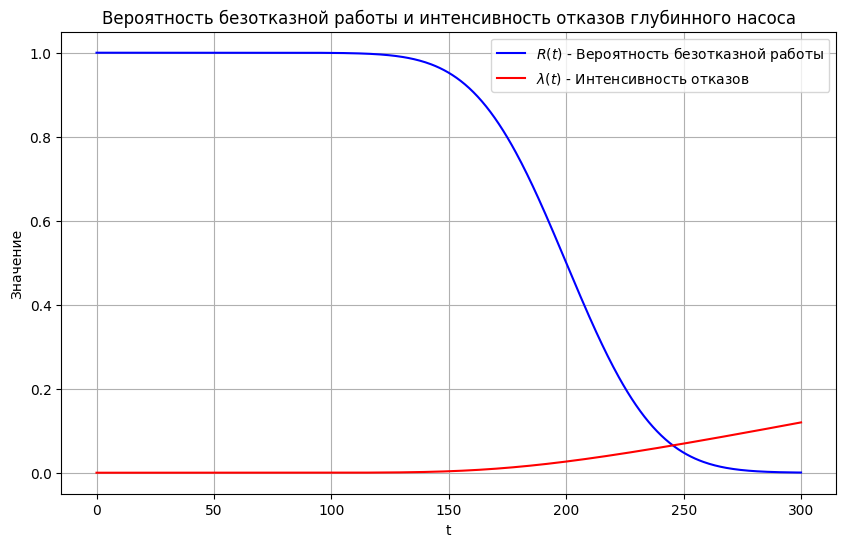

In [7]:
# Дано
T = 200  # среднее время наработки до отказа
sigma = 30  # среднеквадратичное отклонение

# Определим функции
def R(t):
    return 1 - norm.cdf(t, T, sigma)

def f(t):
    return norm.pdf(t, T, sigma)

def lambda_(t):
    return f(t) / R(t)

# Время для построения графиков
t_values = np.linspace(0, 300, 500)

# Вычислим значения функций
R_values = R(t_values)
lambda_values = lambda_(t_values)

# Построим графики
plt.figure(figsize=(10, 6))

# Вероятность безотказной работы R(t)
plt.plot(t_values, R_values, label=r'$R(t)$ - Вероятность безотказной работы', color='blue')

# Интенсивность отказов λ(t)
plt.plot(t_values, lambda_values, label=r'$\lambda(t)$ - Интенсивность отказов', color='red')

# Настройки графика
plt.title("Вероятность безотказной работы и интенсивность отказов глубинного насоса")
plt.xlabel('t')
plt.ylabel('Значение')
plt.grid(True)
plt.legend()

# Показать график
plt.show()


#### *5. Отказ трубопровода возникает из-за заводского брака (19%), коррозии (21%), механических повреждений (14%) и брака строительно-монтажных работ (46%). Средний срок службы трубопроводов, отказавших из-за заводского брака – 12 лет, из-за коррозии – 31 год, из-за механических повреждений – 28 лет, из-за брака строительно-монтажных работ – 22 года. Считая интенсивность отказов по каждой из причин постоянной, построить графики вероятности безотказной работы, плотности наработки до отказа и интенсивности отказов трубопровода.* ####

Если отказ может возникнуть по одной из нескольких причин, то распределение наработки на отказ естественно моделировать смесью распределений,
$$f(t)=\sum_{i=1}^{n}c_if_i(t),~~~~~где~\sum_{i=1}^{n}c_i=1$$
Коэффициенты $ c_i \ge 0 $ имеют смысл вероятностей различных причин отказа.

Дано:
1. Заводской брак:
    - Доля отказов: 19%
    - Средний срок службы: 12 лет
    - Интенсивность отказов: $\lambda_1=\frac{1}{12}$

2. Коррозия:
    - Доля отказов: 21%
    - Средний срок службы: 31 год
    - Интенсивность отказов: $\lambda_2=\frac{1}{31}$

3. Механические повреждения:
    - Доля отказов: 14%
    - Средний срок службы: 28 лет
    - Интенсивность отказов: $\lambda_3=\frac{1}{28}$

4. Брак строительно-монтажных работ:
    - Доля отказов: 46%
    - Средний срок службы: 22 года
    - Интенсивность отказов: $\lambda_4=\frac{1}{22}$

Формулы:
1. Вероятность безотказной работы $R(t)$ для каждой причины: $$R_i(t)=e^{-\lambda_i t}$$


где $\lambda_i$​ — интенсивность отказов для каждой причины.

2. Общая вероятность безотказной работы трубопровода с учетом всех причин:
$$R(t)=0.19R_1(t)+0.21R_2(t)+0.14R_3(t)+0.46R_4(t)$$

3. Плотность наработки до отказа $f(t)$ для каждой причины:
$$f_i(t)=\lambda_i e^{-\lambda_i t}$$

4. Общая плотность наработки до отказа:
$$f(t)=0.19f_1(t)+0.21f_2(t)+0.14f_3(t)+0.46f_4(t)$$

5. Интенсивность отказов трубопровода:
$$\lambda(t)=\frac{f(t)}{R(t)}$$

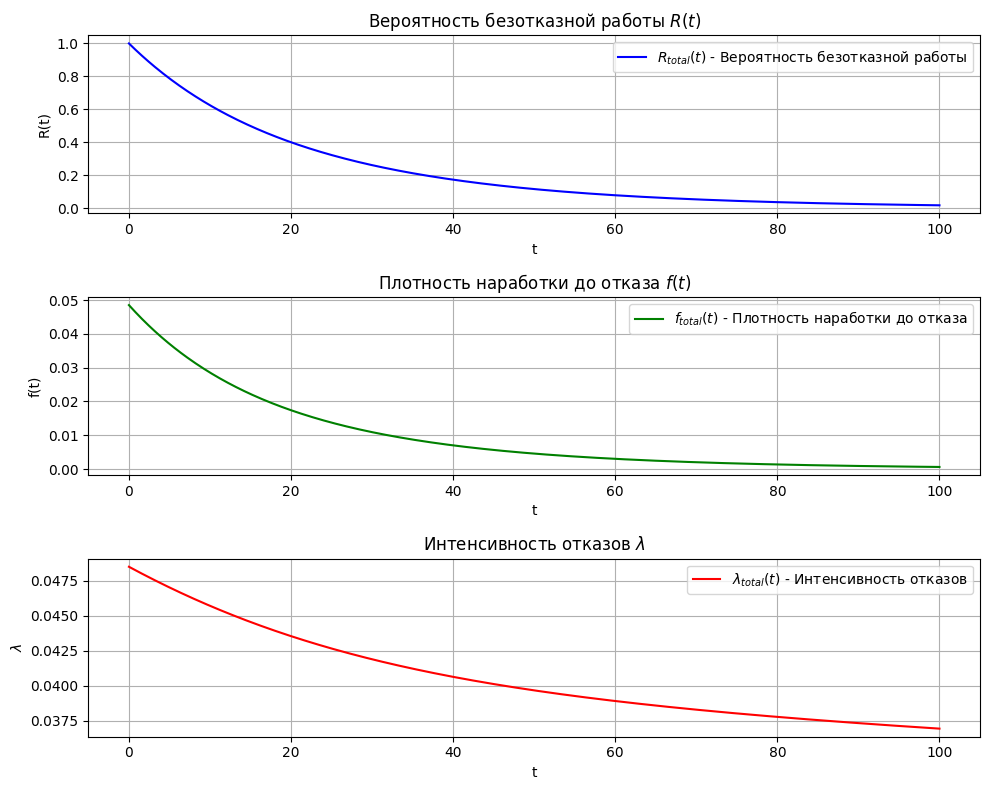

In [8]:
# Дано
probabilities = [0.19, 0.21, 0.14, 0.46]  # вероятности отказов для каждой причины
T_means = [12, 31, 28, 22]  # средний срок службы для каждой причины

# Рассчитаем интенсивности отказов для каждой причины
lambdas = [1 / T_mean for T_mean in T_means]

# Определим функции для общей вероятности безотказной работы и плотности отказов
def R_total(t):
    return sum(p * np.exp(-lmbd * t) for p, lmbd in zip(probabilities, lambdas))

def f_total(t):
    return sum(p * lmbd * np.exp(-lmbd * t) for p, lmbd in zip(probabilities, lambdas))

def lambda_total(t):
    return f_total(t) / R_total(t)

# Время для построения графиков
t_values = np.linspace(0, 100, 500)

# Вычислим значения функций
R_total_values = [R_total(t) for t in t_values]
f_total_values = [f_total(t) for t in t_values]
lambda_total_values = [lambda_total(t) for t in t_values]

# Построим графики
plt.figure(figsize=(10, 8))

# Вероятность безотказной работы R(t)
plt.subplot(3, 1, 1)
plt.plot(t_values, R_total_values, label=r'$R_{total}(t)$ - Вероятность безотказной работы', color='blue')
plt.title(r"Вероятность безотказной работы $R(t)$")
plt.xlabel('t')
plt.ylabel('R(t)')
plt.grid(True)
plt.legend()

# Плотность наработки до отказа f(t)
plt.subplot(3, 1, 2)
plt.plot(t_values, f_total_values, label=r'$f_{total}(t)$ - Плотность наработки до отказа', color='green')
plt.title(r"Плотность наработки до отказа $f(t)$")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.legend()

# Интенсивность отказов λ(t)
plt.subplot(3, 1, 3)
plt.plot(t_values, lambda_total_values, label=r'$\lambda_{total}(t)$ - Интенсивность отказов', color='red')
plt.title(r"Интенсивность отказов $\lambda$")
plt.xlabel('t')
plt.ylabel(r'$\lambda$')
plt.grid(True)
plt.legend()

# Показать график
plt.tight_layout()
plt.show()